<a href="https://colab.research.google.com/github/nurilhaidar/PCVK/blob/main/Week09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> PRAKTIKUM <h2>

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

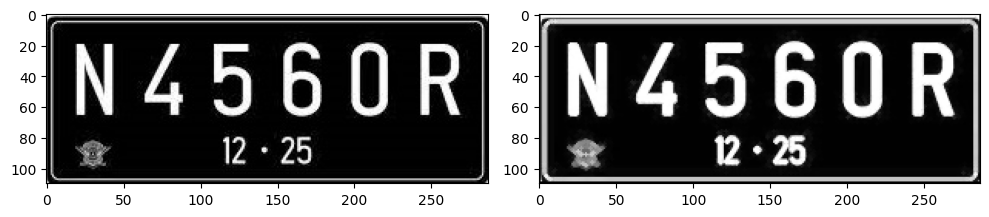

In [93]:
# DILASI TANPA LIBRARY OPENCV

img = cv.imread("/content/drive/MyDrive/Images/plat nomer.jpg", 0)

# Mengambil ukuran panjang dan lebar citra
p, l = img.shape

# Menginisiasi sebuah frame untuk menyimpan citra hasil dilasi
img_dilated = np.zeros((p,l), dtype=np.uint8)

# Menginisiasi SED (Structuring Element Dilation)
sed = np.array([ [0,1,0],
                [1,1,1],
                [0,1,0]])

# Menginisiasi iterasi yang akan digunakan
iteration = 1

# Proses Dilasi
for i in range(iteration, p-iteration):
  for j in range(iteration,q-iteration):
    temp= img[i-iteration:i+iteration+1, j-iteration:j+iteration+1]
    product= temp*sed
    img_dilated[i,j]= np.max(product)

# Menampilkan gambar
fig, axs = plt.subplots(1, 2, figsize=(10,30))
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[1].imshow(cv.cvtColor(img_dilated, cv.COLOR_BGR2RGB))
fig.tight_layout()

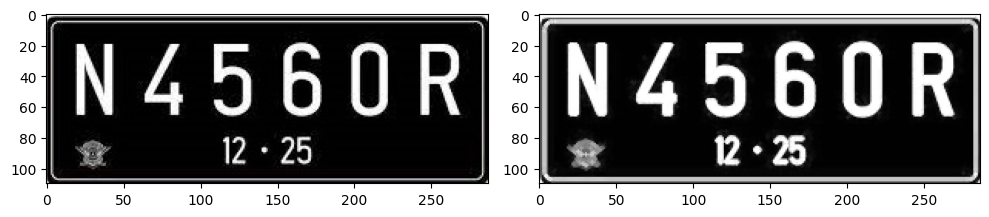

In [94]:
# DILASI DENGAN LIBRARY OPENCV

img2 = cv.imread("/content/drive/MyDrive/Images/plat nomer.jpg")

# Merubah citra menjadi grayscale
img_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Merubah tipe data sed menjadi uint8
sed2 = sed.astype(np.uint8)

# Proses Dilasi menggunakan library OpenCV
img_dilated_2 = cv.dilate(img_gray, sed2, iterations = iteration)

# Menampilkan gambar
fig, axs = plt.subplots(1, 2, figsize=(10,30))
axs[0].imshow(img2)
axs[1].imshow(cv.cvtColor(img_dilated_2, cv.COLOR_BGR2RGB))
fig.tight_layout()

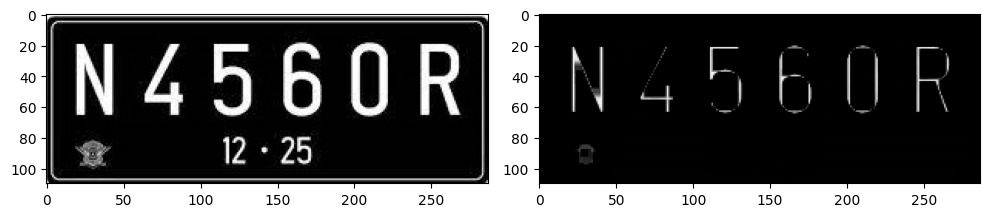

In [95]:
# EROSI TANPA LIBRARY OPENCV

# Menginisiasi frame untuk menyimpan citra hasil erosi
img_erosion= np.zeros((p,l), dtype=np.uint8)

# Menginisiasi SE (Structuring Element)
se = np.ones((5,5), np.uint8)

# Menentukan konstanta
konstanta = (5-1)//2

# Proses Erosi
for i in range(konstanta, p-konstanta):
  for j in range(konstanta,l-konstanta):
    temp= img[i-konstanta:i+konstanta+1, j-konstanta:j+konstanta+1]
    product= temp*se
    img_erosion[i,j]= np.min(product)

# Menampilkan gambar
fig, axs = plt.subplots(1, 2, figsize=(10,30))
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[1].imshow(cv.cvtColor(img_erosion, cv.COLOR_BGR2RGB))
fig.tight_layout()

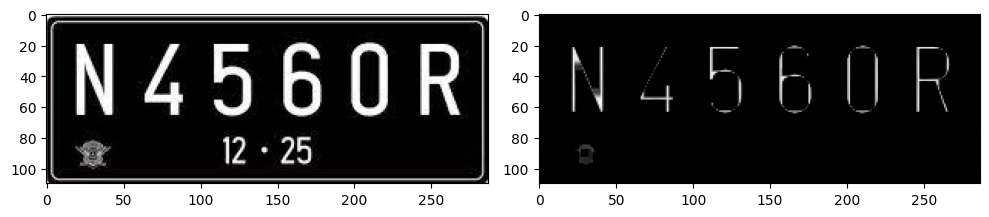

In [96]:
# EROSI MENGGUNAKAN LIBRARY OPENCV

img_erosion_2 = cv.erode(img_gray, se)

# Menampilkan gambar
fig, axs = plt.subplots(1, 2, figsize=(10,30))
axs[0].imshow(img2)
axs[1].imshow(cv.cvtColor(img_erosion_2, cv.COLOR_BGR2RGB))
fig.tight_layout()

In [111]:
# OPENING TANPA MENGGUNAKAN LIBRARY OPENCV

# # Menginisiasi frame untuk menyimpan citra hasil erosi
img_erosion_2 = np.zeros((p,l), dtype=np.uint8)
img_opening = np.zeros((p,l), dtype=np.uint8)

# Menginisiasi SE (Structuring Element)
se2 = np.ones((3,3), np.uint8)
sed2 = np.array([[1,1,1],
               [1,1,1],
               [1,1,1]])

# Menginisiasi iterasi yang akan digunakan
iteration = 3
konstanta = (3-1)//2

# Proses Erosi
for i in range(konstanta, p-konstanta):
  for j in range(konstanta,l-konstanta):
    temp= img[i-konstanta:i+konstanta+1, j-konstanta:j+konstanta+1]
    product= temp*se2
    img_erosion_2[i,j]= np.min(product)

# Proses Dilasi dari citra hasil erosi
for i in range(iteration, p-iteration):
  for j in range(iteration,l-iteration):
    temp= img_erosion_2[i-iteration:i+iteration+1, j-iteration:j+iteration+1]
    product= temp*sed2
    img_opening[i,j]= np.max(product)

# Menampilkan gambar
fig, axs = plt.subplots(1, 2, figsize=(10,30))
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[1].imshow(cv.cvtColor(img_opening, cv.COLOR_BGR2RGB))
fig.tight_layout()

ValueError: ignored